In [42]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [43]:
import numpy as np
import pandas as pd
#importing seaborn for statistical plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
#to split data into test and train
from sklearn.model_selection import train_test_split
#to knn algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
#import appropriate metrices
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc, roc_curve
#to normalise the xdata
from scipy.stats import zscore
#importing scaler
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [44]:
colnames = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class_species']
iris_data=pd.read_csv("iris.data",names= colnames)
#printing random rows
df = iris_data.sample(n=10)
df


,sepal_length,sepal_width,petal_length,petal_width,class_species
56,6.3,3.3,4.7,1.6,Iris-versicolor
120,6.9,3.2,5.7,2.3,Iris-virginica
92,5.8,2.6,4.0,1.2,Iris-versicolor
35,5.0,3.2,1.2,0.2,Iris-setosa
107,7.3,2.9,6.3,1.8,Iris-virginica
106,4.9,2.5,4.5,1.7,Iris-virginica
29,4.7,3.2,1.6,0.2,Iris-setosa
12,4.8,3.0,1.4,0.1,Iris-setosa
82,5.8,2.7,3.9,1.2,Iris-versicolor
86,6.7,3.1,4.7,1.5,Iris-versicolor


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [45]:
print(iris_data.info())

#replace function to replace the 0in each column
def replace_zero_median(X,column_name):
    X[column_name]=X[column_name].replace(0,X[column_name].median())

#loop to iterate through each column
i=0
while colnames[i] !='class_species':
    #print(colnames[i])
    replace_zero_median(iris_data,colnames[i])
    i+=1

iris_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length     150 non-null float64
sepal_width      150 non-null float64
petal_length     150 non-null float64
petal_width      150 non-null float64
class_species    150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
None


,sepal_length,sepal_width,petal_length,petal_width,class_species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [46]:
#removing class value with numerical values
map_class={'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2}

iris_data['class_species']=iris_data['class_species'].map(map_class)
iris_data.head()


,sepal_length,sepal_width,petal_length,petal_width,class_species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [47]:
iris_data.corr()
#none of the variables can be dropped as the correlation between any independent variables and target variables 
#is doesnot lie bewtween the range between -0.1 to 0.1 

,sepal_length,sepal_width,petal_length,petal_width,class_species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
class_species,0.782561,-0.419446,0.949043,0.956464,1.000000


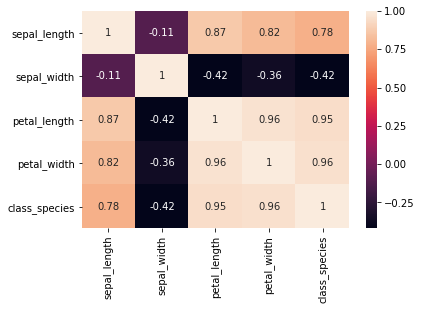

In [48]:
sns.heatmap(iris_data.corr(), annot=True)

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [49]:
#loop to iterate through each column
i=0
while colnames[i] !='class_species':
    col_var=iris_data[colnames[i]].var(ddof=True)
    if(col_var < 0.1):
      iris_data.drop(colnames[i], axis=1, inplace=True)
    print(col_var)
    i+=1
    
iris_data.head()
#no columns were dropped as none of the variance is less than 0.1

0.6856935123042507
0.1880040268456376
3.113179418344519
0.582414317673378


,sepal_length,sepal_width,petal_length,petal_width,class_species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [50]:
 iris_data.var()

sepal_length     0.685694
sepal_width      0.188004
petal_length     3.113179
petal_width      0.582414
class_species    0.671141
dtype: float64

## Question 6

*Plot the scatter matrix for all the variables.*

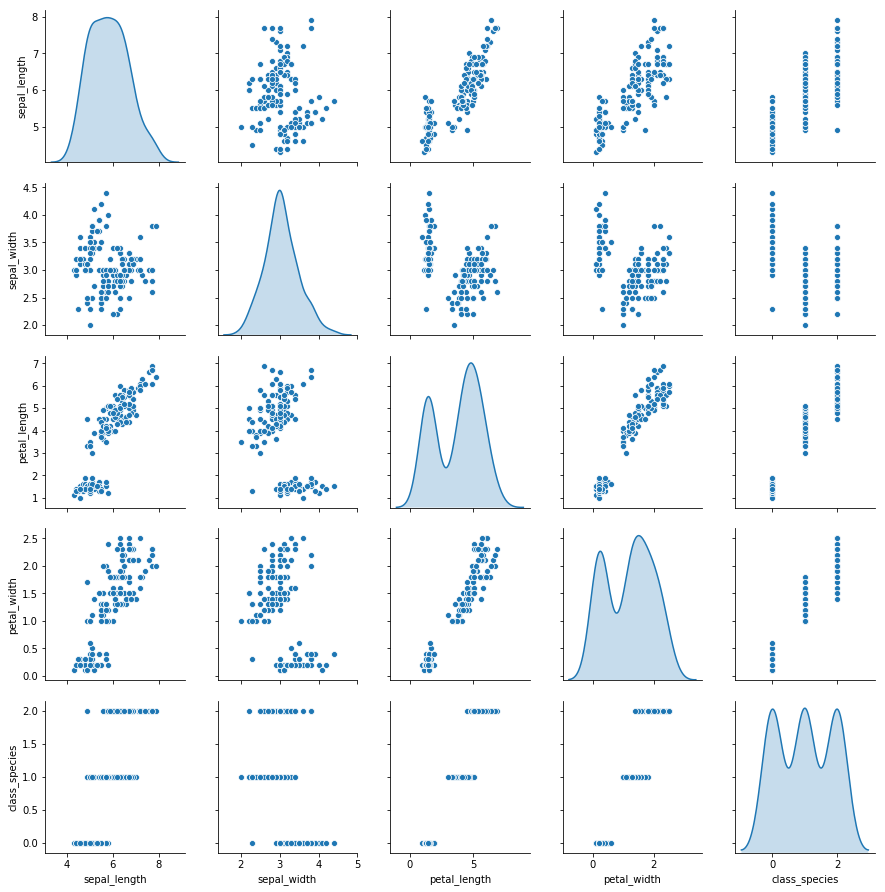

In [51]:
sns.pairplot(iris_data,diag_kind='kde')

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [52]:
X = iris_data.drop("class_species", axis=1)
Y =iris_data["class_species"]
X = X.apply(zscore)  # convert all attributes to Z scale 
test_size = 0.2 # taking 80:20 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

#Xtrain=np.array(X_train)
#Ytrain=np.array(Y_train)

#Xtest=np.array(X_test)
#Ytest=np.array(Y_test)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [53]:

kneigh = KNeighborsClassifier()
kneigh.fit(X_train, Y_train)
print("train score",kneigh.score(X_train, Y_train))
kneigh.fit(X_test, Y_test)
print("test score",kneigh.score(X_test, Y_test))

train score 0.975
test score 0.9


In [54]:
def knn_model_accuracy(i=0):
    kneigh = KNeighborsClassifier(n_neighbors=i)
    kneigh.fit(X_train, Y_train)
    predicted_test = kneigh.predict(X_test)
    acc_score=accuracy_score(Y_test, predicted_test)
    miscla_err=1-acc_score
    temp_list.append([i,acc_score, miscla_err])
    return(temp_list)

In [55]:
temp_list=[]
k=[3,5,9]
for i in k:
    temp_list=knn_model_accuracy(i)
score_table = pd.DataFrame(temp_list,columns=['K_neighbour', 'accuracy score', 'Misclassification error'])
score_table
 
#score_table.append({'K_neighbour':i,'accuracy score':acc_score, 'Misclassification error':miscla_err})

,K_neighbour,accuracy score,Misclassification error
0,3,0.866667,0.133333
1,5,0.900000,0.100000
2,9,0.900000,0.100000


## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [58]:
temp_list=[]
no_of_neighbour=[x for x in range(1,21) if x%2!=0]
for i in no_of_neighbour:
    temp_list=knn_model_accuracy(i)
score_table_new = pd.DataFrame(temp_list,columns=['K_neighbour', 'accuracy score', 'Misclassification_error_MSE'])
score_table_new


,K_neighbour,accuracy score,Misclassification_error_MSE
0,1,0.900000,0.100000
1,3,0.866667,0.133333
2,5,0.900000,0.100000
3,7,0.933333,0.066667
4,9,0.900000,0.100000
5,11,0.900000,0.100000
6,13,0.866667,0.133333
7,15,0.866667,0.133333
8,17,0.866667,0.133333
9,19,0.866667,0.133333


In [59]:
x = score_table_new.iloc[score_table_new['Misclassification_error_MSE'].idxmin()]
print("the k value for which MSE is lowest is",x[0])
#score_table_new

the k value for which MSE is lowest is 7.0


## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

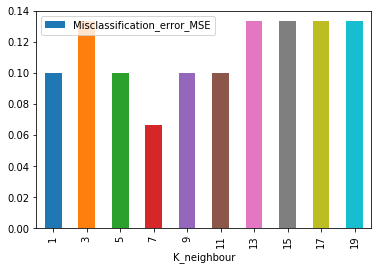

In [60]:
score_table_new.plot(kind='bar',x='K_neighbour',y='Misclassification_error_MSE')
plt.show()
#plot shows that with k=7 MSE is lowest

# Naive Bayes with Iris Data

In [61]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

### Slice  Iris data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [87]:
#colnames = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class_species']
#iris_data=pd.read_csv("iris.data",names= colnames)

#independent variables
X=iris_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
#dependent/target vaiable
Y=iris_data['class_species']

In [88]:
#Check the dataset
print(X.head())
print(Y.head())

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
0    0
1    0
2    0
3    0
4    0
Name: class_species, dtype: int64


# Question 11 
Find the distribution of target variable (Class)

And, Plot the distribution of target variable using histogram

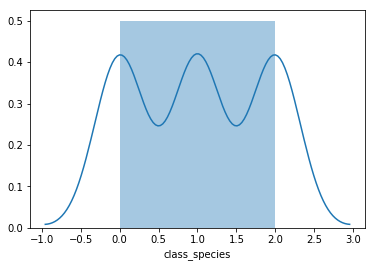

In [64]:
sns.distplot(iris_data['class_species'])

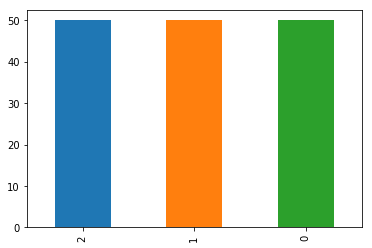

In [65]:
#class is a categorical variable  so used bar plot
Y.value_counts().plot.bar()

In [66]:
#Drop Id variable from data

### Question 12 
Find Correlation among all variables and give your insights 

In [67]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

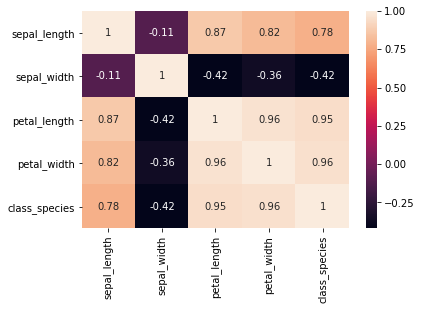

In [68]:
sns.heatmap(iris_data.corr(), annot=True)

#Observations: 
#=======================
#The diagonal of the above matirx shows the auto-correlation of the variables. It is always 1. 
#We can observe that the correlation between Petalwidth and Petallength is highest i.e. 0.96 which means they are highly corelated
#and corelation between sepal width and petal width is lowest i.e. -0.36(close to 0). 
#Correlations can vary from -1 to +1. 
#Closer to +1 means strong positive correlation and close -1 means strong negative correlation. 
#Closer to 0 means poorly correlated.

In [89]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
#vif.round(1)
vif

,VIF Factor,features
0,264.745711,sepal_length
1,97.111606,sepal_width
2,173.968965,petal_length
3,55.488689,petal_width


In [72]:
Xcopy = X.copy()
Xcopy = Xcopy.drop('sepal_length', axis=1)
Xcopy.head()

,sepal_width,petal_length,petal_width
0,3.5,1.4,0.2
1,3.0,1.4,0.2
2,3.2,1.3,0.2
3,3.1,1.5,0.2
4,3.6,1.4,0.2


In [73]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(Xcopy.values, i) for i in range(Xcopy.shape[1])]
vif["features"] = Xcopy.columns
#vif.round(1)
vif

,VIF Factor,features
0,5.896727,sepal_width
1,61.750178,petal_length
2,42.917554,petal_width


In [74]:
Xcopy = Xcopy.copy()
Xcopy = Xcopy.drop('petal_length', axis=1)
Xcopy.head()

,sepal_width,petal_width
0,3.5,0.2
1,3.0,0.2
2,3.2,0.2
3,3.1,0.2
4,3.6,0.2


In [75]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(Xcopy.values, i) for i in range(Xcopy.shape[1])]
vif["features"] = Xcopy.columns
#vif.round(1)
vif

,VIF Factor,features
0,2.897752,sepal_width
1,2.897752,petal_width


In [76]:
#after doing VIF we found that we have to drop the columns sepal_length and petal_length

### Split data in Training and test set in 80:20.

### Question 13 
Do Feature Scaling 

In [77]:
# Use StandardScaler or similar methods
X=iris_data[['sepal_width','petal_width']]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
#scaled_X=pd.DataFrame(scaled_data,columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
scaled_X=pd.DataFrame(scaled_data,columns=['sepal_width', 'petal_width'])
scaled_X

,sepal_width,petal_width
0,1.032057,-1.312977
1,-0.124958,-1.312977
2,0.337848,-1.312977
3,0.106445,-1.312977
4,1.263460,-1.312977
5,1.957669,-1.050031
6,0.800654,-1.181504
7,0.800654,-1.312977
8,-0.356361,-1.312977
9,0.106445,-1.444450


In [78]:
print(np.mean(scaled_data,axis=0))
print(np.std(scaled_data,axis=0))
#print(scaled_data.mean_)
#print(scaled_data.std(axis=0))

[-6.63173220e-16 -2.84217094e-16]
[1. 1.]


In [79]:
#splitting data into train and test
test_size = 0.2 # taking 80:20 training and test set
seed = 4  # Random numbmer seeding for reapeatability of the code
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X, Y, test_size=test_size, random_state=seed)


### Question 14 
Train and Fit NaiveBayes Model

In [80]:
GNB_model = GaussianNB()
GNB_model.fit(X_train, Y_train)
print(GNB_model)


GaussianNB(priors=None, var_smoothing=1e-09)


In [81]:
#Predict Ytrain for train data 
train_prediction = GNB_model.predict(X_train)
accuracy_score_train=accuracy_score(Y_train,train_prediction)
print ("train accuracy =",accuracy_score_train)

#Predict Ytest for test data 
test_prediction = GNB_model.predict(X_test)


train accuracy = 0.9333333333333333


### Question 15 
Print Accuracy and Confusion Matrix and Conclude your findings

In [82]:
# show Confusion Matrix
#from sklearn.metrics import confusion_matrix
metrics.confusion_matrix(Y_test,test_prediction) 
#diagonal is the Tp for each class
#TP0=16, TP1=5,TP2=8
#FN0=0,FN1=0,FN2=1
#FP0=0,FP1=1,FP2=0
#TN0=14, TN1=24,TN2=21

array([[16,  0,  0],
       [ 0,  5,  0],
       [ 0,  1,  8]], dtype=int64)

In [83]:
# show accuracy
accuracy_score_test=accuracy_score(Y_test,test_prediction)
print ("test accuracy =",accuracy_score_test)

test accuracy = 0.9666666666666667


In [84]:
#Show precision and Recall metrics

In [85]:
print("recall score",recall_score(Y_test,test_prediction,average='macro'))
print("precision score",precision_score(Y_test,test_prediction,average='macro'))
print("F1 score",f1_score(Y_test,test_prediction,average='macro'))

recall score 0.9629629629629629
precision score 0.9444444444444445
F1 score 0.9500891265597149


# For Practice  - Optional

All the questions from 16 to 20 are for practice.

# Using SVM with Diebetes Dataset

In [0]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Question 16 
Read the input file 'Diabetes.csv' using Pandas and check it's column names.

Check dimension of dataset.

Check distribution of dependent variable, Outcome and plot it.


In [0]:
# Eye ball the imported dataset

### Out of  768 data points, 500 are labeled as 0 and 268 as 1.
### Outcome 0 means No diabetes, outcome 1 means diabetes

In [0]:
# Check data types and info of dataset

# Question 17 
Check data distribution using summary statistics and provide your findings.

Do correlation analysis and bivariate viualization with Insights


# Question 18 
Do train and test split. 
Optionally - You can do with stratify sampling(optional) on Outcome variable to maintain the distribution of dependent variable

# Question 19 
Train Support Vector Machine Model(1 Marks)

In [0]:
# use from sklearn.svm import SVC

In [0]:
# your insights

# Question 20
Scale the data points using MinMaxScaler

Fit SVM Model on Scale data and give your observation

#we can try increasing either C or gamma to fit a more complex model.

# Optional Question - 
Try improving the model accuracy using C=1000 (1 Marks)

### Here, increasing C allows us to improve the model, resulting in ??? accuracy.
### Let's try to explore different Kernel and C (Bonus for practice)

In [0]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV

In [0]:
 param_grid = [    {        
     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0 ]    } ]

In [0]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [0]:
gs.fit(X_train_scaled, y_train) 

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid=[{'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [0]:
gs.best_estimator_

SVC(C=2.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [0]:
gs.best_score_ 

0.77777777777777779